## Intro to Supervised Classification

For this lesson, we will focus on how to build our first automatic classification algorithms. Since the topic is huge, we will be simply scratching the surface, to get something working. For those interested in learning more, taking the Data Mining course next semester is the natural sequence.

Classification is the task of choosing the correct class label for a given input. In basic classification tasks, each input is considered in isolation from all other inputs, and the set of labels is defined in advance. Some examples of classification tasks are:

* Deciding whether an email is spam or not.
* Deciding what the topic of a news article is, from a fixed list of topic areas such as "sports," "technology," and "politics."
* Deciding whether a given occurrence of the word bank is used to refer to a river bank, a financial institution, the act of tilting to the side, or the act of depositing something in a financial institution.

A classifier is called supervised if it is built based on **training data** containing the correct label for each input. 

<img src="http://www.nltk.org/images/supervised-classification.png" width="50%">

(a) During training, we have a set of input cases, for which we know their correct label. Then we take each input and we extract a set of _features_, which capture the basic information about each input. Pairs of feature sets and labels are fed into the machine learning algorithm to generate a model. 

(b) During prediction, we need to classify input for which we do not have the correct label. For that, we extract the  same set of features from the input. we feed these features into the model, which generates predicted labels.


### Gender Identification

Earlier, we have seen how we can generate frequency distribution (`FreqDist`) objects from texts (or collection of texts), and we discussed how such information can be used for identification of important words in a text.

Let's see how we can use these frequency distributions for our first task: Identify the gender of a name.

One more wordlist corpus is the Names corpus, containing 8,000 first names categorized by gender. The male and female names are stored in separate files. Let's find names which appear in both files, i.e. names that are ambiguous for gender:

In [1]:
import nltk

names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [2]:
male_names = names.words('male.txt')
print(len(male_names))
print(male_names)

2943
['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel', 'Abdul', 'Abdulkarim', 'Abdullah', 'Abe', 'Abel', 'Abelard', 'Abner', 'Abraham', 'Abram', 'Ace', 'Adair', 'Adam', 'Adams', 'Addie', 'Adger', 'Aditya', 'Adlai', 'Adnan', 'Adolf', 'Adolfo', 'Adolph', 'Adolphe', 'Adolpho', 'Adolphus', 'Adrian', 'Adrick', 'Adrien', 'Agamemnon', 'Aguinaldo', 'Aguste', 'Agustin', 'Aharon', 'Ahmad', 'Ahmed', 'Ahmet', 'Ajai', 'Ajay', 'Al', 'Alaa', 'Alain', 'Alan', 'Alasdair', 'Alastair', 'Albatros', 'Albert', 'Alberto', 'Albrecht', 'Alden', 'Aldis', 'Aldo', 'Aldric', 'Aldrich', 'Aldus', 'Aldwin', 'Alec', 'Aleck', 'Alejandro', 'Aleks', 'Aleksandrs', 'Alessandro', 'Alex', 'Alexander', 'Alexei', 'Alexis', 'Alf', 'Alfie', 'Alfonse', 'Alfonso', 'Alfonzo', 'Alford', 'Alfred', 'Alfredo', 'Algernon', 'Ali', 'Alic', 'Alister', 'Alix', 'Allah', 'Allan', 'Allen', 'Alley', 'Allie', 'Allin', 'Allyn', 'Alonso', 'Alonzo', 'Aloysius', 'Alphonse', 'Alphonso', 'Alston', 'Alton', 'Alvin', 'Alwin', 'Ama

In [3]:
female_names = names.words('female.txt')
print(len(female_names))
print(female_names)

5001
['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale', 'Abra', 'Acacia', 'Ada', 'Adah', 'Adaline', 'Adara', 'Addie', 'Addis', 'Adel', 'Adela', 'Adelaide', 'Adele', 'Adelice', 'Adelina', 'Adelind', 'Adeline', 'Adella', 'Adelle', 'Adena', 'Adey', 'Adi', 'Adiana', 'Adina', 'Adora', 'Adore', 'Adoree', 'Adorne', 'Adrea', 'Adria', 'Adriaens', 'Adrian', 'Adriana', 'Adriane', 'Adrianna', 'Adrianne', 'Adrien', 'Adriena', 'Adrienne', 'Aeriel', 'Aeriela', 'Aeriell', 'Ag', 'Agace', 'Agata', 'Agatha', 'Agathe', 'Aggi', 'Aggie', 'Aggy', 'Agna', 'Agnella', 'Agnes', 'Agnese', 'Agnesse', 'Agneta', 'Agnola', 'Agretha', 'Aida', 'Aidan', 'Aigneis', 'Aila', 'Aile', 'Ailee', 'Aileen', 'Ailene', 'Ailey', 'Aili', 'Ailina', 'Ailyn', 'Aime', 'Aimee', 'Aimil', 'Aina', 'Aindrea', 'Ainslee', 'Ainsley', 'Ainslie', 'Ajay', 'Alaine', 'Alameda', 'Alana', 'Alanah', 'Alane', 'Alanna', 'Alayne', 'Alberta', 'Albertina', 'Albertine', 'Albina', 'Alecia', 'Aleda', 'Aleece', 'Al

Now, we need to create our training data. For that, we will create a set of tuples, with the *label* for the name and the actual name:

In [4]:
data = []
data += [("female", name) for name in female_names] 
data += [("male", name) for name in male_names]

In [5]:
# first 5
data[:5]

[('female', 'Abagael'),
 ('female', 'Abagail'),
 ('female', 'Abbe'),
 ('female', 'Abbey'),
 ('female', 'Abbi')]

In [6]:
data[-5:]

[('male', 'Zeus'),
 ('male', 'Zippy'),
 ('male', 'Zollie'),
 ('male', 'Zolly'),
 ('male', 'Zorro')]

#### Randomize the order of the names, since the first are always female and the last always male

In [7]:
import random
random.shuffle(data)
data

[('female', 'Cordey'),
 ('female', 'Fatima'),
 ('male', 'Benn'),
 ('male', 'Davidde'),
 ('female', 'Lilli'),
 ('female', 'Lissa'),
 ('male', 'Axel'),
 ('female', 'Angeline'),
 ('female', 'Ailyn'),
 ('male', 'Darien'),
 ('male', 'Antonius'),
 ('male', 'Shaw'),
 ('female', 'Trista'),
 ('female', 'Ranna'),
 ('male', 'Allah'),
 ('male', 'Mortimer'),
 ('female', 'Lusa'),
 ('female', 'Constantia'),
 ('female', 'Kellyann'),
 ('female', 'Dea'),
 ('female', 'Dore'),
 ('female', 'Kerrill'),
 ('male', 'Giffie'),
 ('female', 'Valina'),
 ('female', 'Kaitlin'),
 ('female', 'Josie'),
 ('female', 'Sashenka'),
 ('male', 'Tobe'),
 ('male', 'Gary'),
 ('female', 'Netti'),
 ('female', 'Gipsy'),
 ('female', 'Chrissie'),
 ('male', 'Colbert'),
 ('female', 'Harlie'),
 ('female', 'Lila'),
 ('female', 'Almeta'),
 ('female', 'Lyndsie'),
 ('female', 'Barry'),
 ('female', 'Fredi'),
 ('female', 'Fey'),
 ('female', 'Gita'),
 ('male', 'Jackson'),
 ('female', 'Dulsea'),
 ('male', 'Townsend'),
 ('female', 'Amalita'),
 (

Now, we can build our first rudimentary classifier: We lookup a name in the list, and return the gender in the label.

In [8]:
def classify_name(input_name):
    for (label, name) in data:
        if name == input_name:
            print(label);

Let's try now our classifier for a few different inputs:

In [9]:
input_name = "John"
print("Trying ", input_name)
classify_name(input_name)

Trying  John
male


In [10]:
input_name = "Jane"
print("Trying ", input_name)
classify_name(input_name)

Trying  Jane
female


In [11]:
input_name = "Leslie"
print("Trying ", input_name)
classify_name(input_name)

Trying  Leslie
male
female


In [12]:
input_name = "Norman"
print("Trying ", input_name)
classify_name(input_name)

Trying  Norman
male


Apparently, our classifier has a few problems. Cannot handle at all names that are not in the training data, and has problems when the names appear in both lists. Let's see how many such names there are:

In [13]:
m = set(male_names)
f= set(female_names)
# intersect the two sets of names
ambiguous = m & f
print(len(ambiguous))
print(sorted(ambiguous))

365
['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel', 'Angie', 'Ariel', 'Ashley', 'Aubrey', 'Augustine', 'Austin', 'Averil', 'Barrie', 'Barry', 'Beau', 'Bennie', 'Benny', 'Bernie', 'Bert', 'Bertie', 'Bill', 'Billie', 'Billy', 'Blair', 'Blake', 'Bo', 'Bobbie', 'Bobby', 'Brandy', 'Brett', 'Britt', 'Brook', 'Brooke', 'Brooks', 'Bryn', 'Cal', 'Cam', 'Cammy', 'Carey', 'Carlie', 'Carlin', 'Carmine', 'Carroll', 'Cary', 'Caryl', 'Casey', 'Cass', 'Cat', 'Cecil', 'Chad', 'Chris', 'Chrissy', 'Christian', 'Christie', 'Christy', 'Clair', 'Claire', 'Clare', 'Claude', 'Clem', 'Clemmie', 'Cody', 'Connie', 'Constantine', 'Corey', 'Corrie', 'Cory', 'Courtney', 'Cris', 'Daffy', 'Dale', 'Dallas', 'Dana', 'Dani', 'Daniel', 'Dannie', 'Danny', 'Darby', 'Darcy', 'Darryl', 'Daryl', 'Deane', 'Del', 'Dell', 'Demetris', 'Dennie', 'Denny', 'Devin', 'Devon', 'Dion', 'Dionis', 'Dominique', 'Donnie', 'Donny',

One way to improve our classifier is to use a bigger dataset, or count the actual frequency of each name in female and male versions, instead of having just a list. However, none of these solve the underlying problem that the classifier cannot extend beyond the training data.

### Featurization

Featurization is a process in which we represent an input using a set of values, that are derived from the input. 

For example, for gender identification, the last character of the name can give hints about the gender. For example, it is well known that names ending in the letter `a` are almost always female. 

Let's create a revised data set

In [14]:
last_char_data = [(label, name[-1]) for (label, name) in data]
last_char_data[:10]

[('female', 'y'),
 ('female', 'a'),
 ('male', 'n'),
 ('male', 'e'),
 ('female', 'i'),
 ('female', 'a'),
 ('male', 'l'),
 ('female', 'e'),
 ('female', 'n'),
 ('male', 'n')]

In [15]:
last_char_data[-10:]

[('male', 'o'),
 ('male', 'n'),
 ('female', 'a'),
 ('male', 'm'),
 ('female', 'n'),
 ('female', 'e'),
 ('male', 'n'),
 ('female', 'e'),
 ('female', 'a'),
 ('female', 'y')]

#### Now, we can use the concept of **conditional** frequency distribution, to compare the frequencies of each feature in the two classes:

In [16]:
cfd = nltk.ConditionalFreqDist(last_char_data)

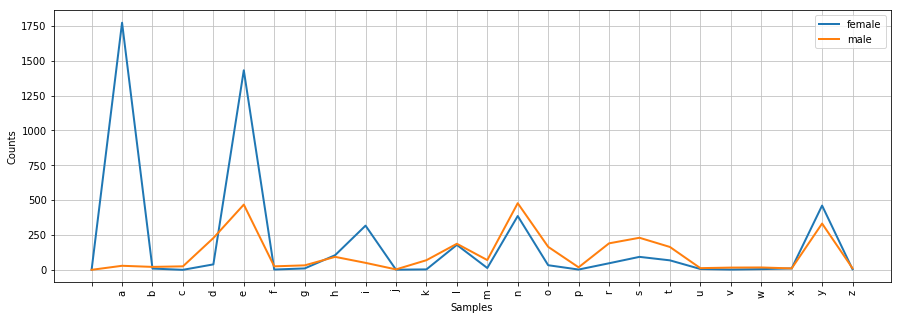

In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
# Make the graphs a bit prettier, and bigger
plt.rcParams['figure.figsize'] = (15, 5)

cfd.plot()

This plot shows the number of female and male names ending with each letter of the alphabet; most names ending with a, e or i are female; names ending in h and l are ambiguous and can both male and female; names ending in k, o, r, s, and t are more likely to be male.

#### Let's build a classifier to model these differences more precisely.

The first step in creating a classifier is deciding what features of the input are relevant, and how to encode those features. For this example, we'll start by just looking at the final letter of a given name. The following feature extractor function builds a dictionary containing relevant information about a given name:

In [18]:
def gender_features(word):
     return {
        'last_letter': word[-1]
    }

gender_features('Shrek')

{'last_letter': 'k'}

Of course, we can add more features if we want. (But beware, as this is not always better, as we will see later.)

In [19]:
def gender_features(word):
     return {
        'last_letter': word[-1],
        'first_letter': word[0],
        'penultimate_letter': word[-2],
        'last_two_letters': word[-2:]
    }

gender_features('Shrek')

{'first_letter': 'S',
 'last_letter': 'k',
 'last_two_letters': 'ek',
 'penultimate_letter': 'e'}

The returned dictionary, known as a feature set, maps from features' names to their values. Feature names are case-sensitive strings that typically provide a short human-readable description of the feature. Feature values are values with simple types, such as booleans, numbers, and strings.

Now that we've defined a feature extractor, we need to prepare a list of examples and corresponding class labels.

In [20]:
from nltk.corpus import names

def gender_features(word):
     return {
        'last_letter': word[-1]
    }

male_names = names.words('male.txt')
female_names = names.words('female.txt')

labeled_names = []
labeled_names += [("female", name) for name in female_names] 
labeled_names += [("male", name) for name in male_names]
# create the labeled feature set

labeled_featuresets = [(gender_features(name), gender) for (gender, name) in labeled_names]

In [21]:
labeled_featuresets[-5:]

[({'last_letter': 's'}, 'male'),
 ({'last_letter': 'y'}, 'male'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'y'}, 'male'),
 ({'last_letter': 'o'}, 'male')]


randomize and then split into a training and test set. We will train on the training set, and then test the
classifier on the test set.

In [22]:
# We want to randomize the order, before separating into training and test set
import random
random.shuffle(labeled_featuresets)

In [23]:
labeled_featuresets

[({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'm'}, 'male'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'y'}, 'male'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'd'}, 'female'),
 ({'last_letter': 't'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'l'}, 'male'),
 ({'last_letter': 'n'}, 'female'),
 ({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'n'}, 'male'),
 ({'last_letter': 'n'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'n'}, 'female'),
 ({'last_letter': 'y'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'r'}, 'female'),
 ({'last_letter': 'o'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'h'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'i'}, 'female'),
 ({'last_letter': 'n'}, 'male'),
 ({'las

In [24]:
len(labeled_featuresets)

7944

Next, we divide the resulting list of feature sets into a **training set** and a **test set**. The training set is used to train our classifier. The test set will **not** be used for training but only for evaluating the performance of our classifier for "unseen" data that have not been present in the training data.

In [25]:
# We will keep 500 examples for testing and the remaining ones will be training
train_set, test_set = labeled_featuresets[500:], labeled_featuresets[:500]

Now that we have our data ready, let's build our classifier. We will use a "Naive Bayes" classifier. We are not going to talk about the underlying mathematical details of the classification model, and instead will treat it as a black box. Covering how the NB classifier works, its strengths and weaknesses, and learning about alternative classification models (e.g., decision trees, logistic regression, support vector machines, etc) is the topic of the Data Mining class.

In [26]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

Let's just test it out on some names that did not appear in its training data:

In [27]:
classifier.classify(gender_features('Neo'))

'male'

In [28]:
classifier.classify(gender_features('Trinity'))

'female'

Observe that these character names from The Matrix are correctly classified. Although this science fiction movie is set in 2199, it still conforms with our expectations about names and genders. 

Let's check a few more:

In [29]:
smalltest = ["Carlos", "Andres", "Burcak", "Utku", "Dmitriy", "Michael", "Jeffrey", 
             "Akshay", "Heidi", "Shameka", "Angela", "Albert", "Alejandro", "Mark", 
             "Libin", "Chris", "Rishi", "Dimitrij", "David", "Alexander", "Han", "Wen", 
             "Alvin", "Mitch", "Tyler", "Kai","Wei", "Aamer", "Rafael", "John", "Paola", 
             "Keith", "Chinmaya", "Aman", "Salma", "Alex", "Li", "Jennifer", "Tsung-Hsiang", 
             "David", "Neil", "Brian", "Ajay", "Esel", "Theophilus", "Arun", "Barath", 
             "Akash", "Yaninee", "Julius", "Brad", "Anibal", "Mark", "Leandro", "Johan" , 
             "Marcus", "Randy", "Saif", "Nande", "Cactus", "Tim", "Jesus", "Chad", "Craig", 
             "Mark", "Dannial", "Lin", "Cindy", "Patrick", "Tanik", "Ahmad", "Tiisang", "Fengen", 
             "Nicholas", "Bharat", "Carlos", "Vinod", "Linda", "Tim", "Garry", "Qing"]

for name in sorted(smalltest):
    features = gender_features(name)
    print("Name: ", name, " ==> ", classifier.classify(features))
    

Name:  Aamer  ==>  male
Name:  Ahmad  ==>  male
Name:  Ajay  ==>  female
Name:  Akash  ==>  female
Name:  Akshay  ==>  female
Name:  Albert  ==>  male
Name:  Alejandro  ==>  male
Name:  Alex  ==>  female
Name:  Alexander  ==>  male
Name:  Alvin  ==>  male
Name:  Aman  ==>  male
Name:  Andres  ==>  male
Name:  Angela  ==>  female
Name:  Anibal  ==>  female
Name:  Arun  ==>  male
Name:  Barath  ==>  female
Name:  Bharat  ==>  male
Name:  Brad  ==>  male
Name:  Brian  ==>  male
Name:  Burcak  ==>  male
Name:  Cactus  ==>  male
Name:  Carlos  ==>  male
Name:  Carlos  ==>  male
Name:  Chad  ==>  male
Name:  Chinmaya  ==>  female
Name:  Chris  ==>  male
Name:  Cindy  ==>  female
Name:  Craig  ==>  male
Name:  Dannial  ==>  female
Name:  David  ==>  male
Name:  David  ==>  male
Name:  Dimitrij  ==>  male
Name:  Dmitriy  ==>  female
Name:  Esel  ==>  female
Name:  Fengen  ==>  male
Name:  Garry  ==>  female
Name:  Han  ==>  male
Name:  Heidi  ==>  female
Name:  Jeffrey  ==>  female
Name:  Jenn

We can systematically evaluate the classifier on a much larger quantity of unseen data: This is where we use the test set.
Note that if we run this again on a different training set, we will get different results.
##### Let's see what percentage of the test set our classifier classified correctly
#    

In [30]:
print(nltk.classify.accuracy(classifier, test_set))

0.776


Finally, we can examine the classifier to determine which features it found most effective for distinguishing the names' genders:
##### INFORMATIVE FEATURES

In [31]:
classifier.show_most_informative_features(26)

Most Informative Features
             last_letter = 'a'            female : male   =     33.1 : 1.0
             last_letter = 'k'              male : female =     31.9 : 1.0
             last_letter = 'f'              male : female =     16.0 : 1.0
             last_letter = 'v'              male : female =     15.3 : 1.0
             last_letter = 'p'              male : female =     12.6 : 1.0
             last_letter = 'd'              male : female =      9.9 : 1.0
             last_letter = 'o'              male : female =      9.2 : 1.0
             last_letter = 'm'              male : female =      9.1 : 1.0
             last_letter = 'r'              male : female =      6.7 : 1.0
             last_letter = 'w'              male : female =      5.9 : 1.0
             last_letter = 'g'              male : female =      4.6 : 1.0
             last_letter = 'u'              male : female =      4.6 : 1.0
             last_letter = 't'              male : female =      4.2 : 1.0

#### Exercise 

Modify the gender_features() function to provide the classifier with features encoding the length of the name, its first letter, and any other features that seem like they might be informative. Retrain the classifier with these new features, and test its accuracy.

In [32]:
# your code here
from nltk.corpus import names
import random

# Modify this function to add more features
def gender_features(word):
    return {
        'last_letter': word[-1]
    }

male_names = names.words('male.txt')
female_names = names.words('female.txt')

labeled_names = []
labeled_names += [("female", name) for name in female_names] 
labeled_names += [("male", name) for name in male_names]

labeled_featuresets = [(gender_features(name), gender) for (gender, name) in labeled_names]

# We are going to repeat the process multiple times, as the shuffling generates different 
# sets of training and test data
train_set, test_set = [], []
trials = 50
psum = 0;
cnt = 0;
for i in range(trials):
    random.shuffle(labeled_featuresets)
    # We will keep 500 examples for testing and the remaining ones will be training
    train_set, test_set = labeled_featuresets[500:], labeled_featuresets[:500]
    classifier = nltk.NaiveBayesClassifier.train(train_set)
    accuracy = nltk.classify.accuracy(classifier, test_set)
    # print("Trial:", cnt, " Accuracy:", accuracy)
    psum += accuracy
    cnt += 1
    
print("Avg Accuracy: ", (psum/cnt))

Avg Accuracy:  0.7615599999999998


In [33]:
classifier.show_most_informative_features(100)

Most Informative Features
             last_letter = 'k'              male : female =     42.6 : 1.0
             last_letter = 'a'            female : male   =     34.9 : 1.0
             last_letter = 'f'              male : female =     16.4 : 1.0
             last_letter = 'p'              male : female =     11.1 : 1.0
             last_letter = 'm'              male : female =     10.0 : 1.0
             last_letter = 'd'              male : female =      9.9 : 1.0
             last_letter = 'v'              male : female =      9.7 : 1.0
             last_letter = 'o'              male : female =      8.4 : 1.0
             last_letter = 'r'              male : female =      6.7 : 1.0
             last_letter = 'w'              male : female =      6.5 : 1.0
             last_letter = 'g'              male : female =      5.2 : 1.0
             last_letter = 'b'              male : female =      4.8 : 1.0
             last_letter = 's'              male : female =      4.1 : 1.0

### Choosing the right features

Selecting relevant features and deciding how to encode them for a learning method can have an enormous impact on the learning method's ability to extract a good model. Much of the interesting work in building a classifier is deciding what features might be relevant, and how we can represent them. Although it's often possible to get decent performance by using a fairly simple and obvious set of features, there are usually significant gains to be had by using carefully constructed features based on a thorough understanding of the task at hand.

Typically, feature extractors are built through a process of trial-and-error, guided by intuitions about what information is relevant to the problem. It's common to start with a "kitchen sink" approach, including all the features that you can think of, and then checking to see which features actually are helpful.

In [34]:
def gender_features_expanded(name):
    features = {}
    #features["first_letter"] = name[0].lower()
    #features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count(%s)" % letter] = name.lower().count(letter)
        features["has(%s)" % letter] = (letter in name.lower())
    return features

print(gender_features_expanded('Norman'))

{'count(a)': 1, 'has(a)': True, 'count(b)': 0, 'has(b)': False, 'count(c)': 0, 'has(c)': False, 'count(d)': 0, 'has(d)': False, 'count(e)': 0, 'has(e)': False, 'count(f)': 0, 'has(f)': False, 'count(g)': 0, 'has(g)': False, 'count(h)': 0, 'has(h)': False, 'count(i)': 0, 'has(i)': False, 'count(j)': 0, 'has(j)': False, 'count(k)': 0, 'has(k)': False, 'count(l)': 0, 'has(l)': False, 'count(m)': 1, 'has(m)': True, 'count(n)': 2, 'has(n)': True, 'count(o)': 1, 'has(o)': True, 'count(p)': 0, 'has(p)': False, 'count(q)': 0, 'has(q)': False, 'count(r)': 1, 'has(r)': True, 'count(s)': 0, 'has(s)': False, 'count(t)': 0, 'has(t)': False, 'count(u)': 0, 'has(u)': False, 'count(v)': 0, 'has(v)': False, 'count(w)': 0, 'has(w)': False, 'count(x)': 0, 'has(x)': False, 'count(y)': 0, 'has(y)': False, 'count(z)': 0, 'has(z)': False}


However, there are usually limits to the number of features that you should use with a given learning algorithm — if we provide too many features, then the algorithm will have a higher chance of relying on idiosyncrasies of your training data that don't generalize well to new examples. This problem is known as **overfitting**, and can be especially problematic when working with small training sets. 

For example, if we train a naive Bayes classifier using the feature extractor shown in 1.2, it will overfit relatively small training set, resulting in a system whose accuracy is lower than the accuracy of a classifier that only pays attention to the final letter of each name:

In [35]:
random.shuffle(labeled_names)
featuresets = [(gender_features_expanded(n), gender) for (gender, n) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
train_names, test_names = labeled_names[500:], labeled_names[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))
classifier.show_most_informative_features(20)

0.698
Most Informative Features
                count(v) = 2              female : male   =      9.2 : 1.0
                count(a) = 3              female : male   =      5.2 : 1.0
                count(w) = 1                male : female =      4.4 : 1.0
                  has(w) = True             male : female =      4.4 : 1.0
                count(o) = 2                male : female =      3.8 : 1.0
                count(f) = 2                male : female =      3.3 : 1.0
                count(a) = 2              female : male   =      3.1 : 1.0
                count(e) = 3              female : male   =      3.1 : 1.0
                count(d) = 3                male : female =      2.8 : 1.0
                count(y) = 2              female : male   =      2.8 : 1.0
                count(l) = 3              female : male   =      2.7 : 1.0
                count(i) = 3                male : female =      2.7 : 1.0
                count(w) = 2                male : female =      2.4

So, let's keep our original classifier

In [36]:
random.shuffle(labeled_names)
featuresets = [(gender_features(n), gender) for (gender, n) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
train_names, test_names = labeled_names[500:], labeled_names[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.794


We can generate a list of the errors that the classifier makes when predicting name genders:

In [37]:
errors = []
for (correct, name) in test_names:
    guess = classifier.classify(gender_features(name))
    if correct != guess:
        errors.append( (correct, guess, name) )

In [38]:
len(errors)

103

In [39]:
errors

[('male', 'female', 'Barny'),
 ('female', 'male', 'Kara-Lynn'),
 ('male', 'female', 'Nickie'),
 ('female', 'male', 'Nadean'),
 ('female', 'male', 'Mel'),
 ('male', 'female', 'Jeremiah'),
 ('female', 'male', 'Ceil'),
 ('female', 'male', 'Maribel'),
 ('male', 'female', 'Ollie'),
 ('female', 'male', 'Dix'),
 ('female', 'male', 'Kaitlyn'),
 ('female', 'male', 'Kevyn'),
 ('female', 'male', 'Daryl'),
 ('male', 'female', 'Laurie'),
 ('female', 'male', 'Angil'),
 ('male', 'female', 'Ike'),
 ('male', 'female', 'Tobe'),
 ('female', 'male', 'Sherill'),
 ('male', 'female', 'Ajay'),
 ('female', 'male', 'Carmel'),
 ('female', 'male', 'Cameo'),
 ('male', 'female', 'Sidney'),
 ('male', 'female', 'Gerry'),
 ('male', 'female', 'Henry'),
 ('female', 'male', 'Kipp'),
 ('male', 'female', 'Rourke'),
 ('female', 'male', 'Robin'),
 ('male', 'female', 'Guy'),
 ('male', 'female', 'Parke'),
 ('female', 'male', 'Nichol'),
 ('male', 'female', 'Isidore'),
 ('female', 'male', 'Margo'),
 ('female', 'male', 'Carlynn')

#### Confusion Matrix

If we want to learn more about the specific types of errors for our classifier, we can create a "confusion matrix". A confusion matrix shows the number of times that a classifier classifies a specific instance into a particular class (E.g., males as males, males as females, etc).

In [40]:
gold = [gender for (features,gender) in test_set]

In [41]:
guess = [classifier.classify(features) for (features, gender) in test_set]

In [42]:
gold = [gender for (features,gender) in test_set]
guess = [classifier.classify(features) for (features, gender) in test_set]

cm = nltk.ConfusionMatrix(gold, guess)

In [47]:
print(cm.pretty_format(sort_by_count=True, show_percents=False))

       |   f     |
       |   e     |
       |   m   m |
       |   a   a |
       |   l   l |
       |   e   e |
-------+---------+
female |<262> 56 |
  male |  64<118>|
-------+---------+
(row = reference; col = test)



In [48]:
print(cm.pretty_format(sort_by_count=True, show_percents=True))

       |      f        |
       |      e        |
       |      m      m |
       |      a      a |
       |      l      l |
       |      e      e |
-------+---------------+
female | <52.4%> 11.2% |
  male |  12.8% <23.6%>|
-------+---------------+
(row = reference; col = test)



We can then examine individual error cases where the model predicted the wrong label, and try to determine what additional pieces of information would allow it to make the right decision (or which existing pieces of information are tricking it into making the wrong decision). The feature set can then be adjusted accordingly. The names classifier that we have built generates about 100 errors on the test corpus:

In [49]:
for (correct, guess, name) in sorted(errors):
    print('correct=%-8s guess=%-8s name=%-30s' % (correct, guess, name))

correct=female   guess=male     name=Ardelis                       
correct=female   guess=male     name=Arden                         
correct=female   guess=male     name=Bette-Ann                     
correct=female   guess=male     name=Betteann                      
correct=female   guess=male     name=Bo                            
correct=female   guess=male     name=Brear                         
correct=female   guess=male     name=Brenn                         
correct=female   guess=male     name=Candis                        
correct=female   guess=male     name=Carmel                        
correct=female   guess=male     name=Caryn                         
correct=female   guess=male     name=Cass                          
correct=female   guess=male     name=Celestyn                      
correct=female   guess=male     name=Chris                         
correct=female   guess=male     name=Chrysler                      
correct=female   guess=male     name=Clovis     

Looking through this list of errors makes it clear that some suffixes that are more than one letter can be indicative of name genders. For example, names ending in yn appear to be predominantly female, despite the fact that names ending in n tend to be male; and names ending in ch are usually male, even though names that end in h tend to be female. We therefore adjust our feature extractor to include features for two-letter suffixes:

In [50]:
def gender_features(word):
    return {'last_letter': word[-1:],
           'last_two_letters': word[-2:]}

random.shuffle(labeled_names)
featuresets = [(gender_features(n), gender) for (gender, n) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
train_names, test_names = labeled_names[500:], labeled_names[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.798


This error analysis procedure can then be repeated, checking for patterns in the errors that are made by the newly improved classifier. Each time the error analysis procedure is repeated, we should select a different test/training split, to ensure that the classifier does not start to reflect idiosyncrasies in the test set.